<center><h1>Computational Statistics:</h1></center>
<center><h1>Simulating Outcomes</h1></center>

Preview
-------

- Learn to use Python's `random` module
- Simulating probabilities to common events

In [83]:
reset -fs

In [84]:
# Python's random generates pseudo-random numbers
# from random import 

In [85]:
# Import a function that chooses amoung discrete outcomes
from random import choice

In [86]:
choice?

In [87]:
# Roll a die 🎲
choice([1, 2, 3, 4, 5, 6])

1

How could we roll a 4-sided die? or a 20-sided die?

In [88]:
# Let's create a variable for number of sides

In [89]:
# Traditional die: A cube
n_sides = 6
faces = list(range(1, n_sides+1)) 
choice(faces)

3

That is a lot of typing. Let's make a function:

In [90]:
from typing import List

def faces(n_sides: int) -> List[int]:
    "Enumerate the faces of a die"
    return list(range(1, n_sides+1))

In [91]:
faces?

In [92]:
# Roll a 20-sided die
choice(faces(n_sides=20))

20

What if we want to roll more than one die?

In [93]:
from random import choices

choices?

Let's check out the documentation for [random.choices](https://docs.python.org/3/library/random.html)

In [94]:
# Let's roll our die a couple of times
choices(population=faces(n_sides=6),
        k=2)

[5, 3]

In [95]:
# How could we roll a 20-sided die 1,000 times?



In [96]:
choices(population=faces(n_sides=20),
        k=1_000)

[13,
 7,
 19,
 17,
 20,
 19,
 11,
 3,
 16,
 13,
 20,
 6,
 8,
 17,
 13,
 12,
 11,
 2,
 15,
 2,
 12,
 18,
 14,
 14,
 2,
 17,
 2,
 15,
 11,
 13,
 10,
 2,
 20,
 7,
 7,
 20,
 12,
 19,
 1,
 15,
 17,
 10,
 10,
 1,
 2,
 8,
 1,
 3,
 10,
 19,
 10,
 19,
 8,
 12,
 8,
 16,
 4,
 6,
 6,
 5,
 19,
 17,
 6,
 4,
 12,
 9,
 6,
 6,
 13,
 17,
 5,
 10,
 11,
 8,
 2,
 19,
 11,
 16,
 15,
 13,
 11,
 12,
 8,
 17,
 15,
 18,
 18,
 1,
 15,
 11,
 11,
 7,
 16,
 1,
 16,
 1,
 10,
 10,
 14,
 11,
 2,
 18,
 11,
 13,
 9,
 18,
 12,
 7,
 11,
 5,
 11,
 19,
 17,
 14,
 5,
 6,
 7,
 1,
 12,
 10,
 16,
 13,
 13,
 19,
 16,
 4,
 9,
 19,
 6,
 3,
 9,
 12,
 17,
 1,
 12,
 20,
 6,
 9,
 14,
 16,
 5,
 5,
 8,
 18,
 4,
 20,
 18,
 15,
 14,
 10,
 3,
 12,
 1,
 15,
 4,
 18,
 8,
 18,
 8,
 16,
 4,
 6,
 5,
 11,
 1,
 4,
 15,
 5,
 8,
 18,
 8,
 3,
 7,
 12,
 15,
 6,
 10,
 1,
 14,
 4,
 6,
 4,
 10,
 9,
 12,
 10,
 7,
 1,
 14,
 16,
 17,
 17,
 19,
 10,
 9,
 18,
 5,
 15,
 8,
 10,
 18,
 4,
 1,
 17,
 15,
 1,
 7,
 19,
 20,
 6,
 10,
 7,
 6,
 13,
 4,
 5,
 13,
 1,
 2

In [97]:
# What if we want to cheat by having a weighted die?



In [98]:
rolls = choices(population=faces(n_sides=4),
        weights=[30, 30, 20, 10], 
        k=25)
print(rolls)

[2, 2, 1, 1, 4, 2, 3, 2, 4, 1, 4, 1, 1, 4, 1, 3, 2, 1, 3, 1, 1, 2, 1, 2, 2]


That is hard to understand what is going with all those numbers. Let's organized them …

Data Scientists ❤️ counting
------

Data Science is mostly about counting.

In [99]:
# Let's count the outcomes of rolls …



In [100]:
from collections import Counter

Counter(rolls)

Counter({2: 8, 1: 10, 4: 4, 3: 3})

In [101]:
# How could we order the results?



In [102]:
rolls_counts = Counter(rolls)

# Sort by faces
sorted(rolls_counts.items(), key=lambda x: x[0]) 

# Sort by counts
sorted(rolls_counts.items(), key=lambda x: x[1])

# Store the sorted results as a dictionary
rolls_counts = dict(sorted(rolls_counts.items(), key=lambda x: x[0]))

Visualization Data Science is about visualization.
------

Python's visualization is kinda mess. It is a bazaar, not a cathedral. There are many options. Some people say too many options.

`matplotlib` is the default. 

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
# How should we plot these?
rolls_counts

{1: 10, 2: 8, 3: 3, 4: 4}

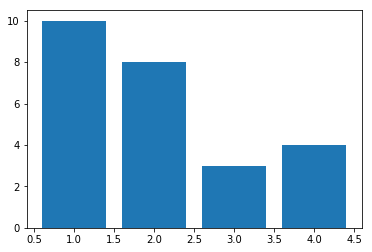

In [105]:
# Let's plot the value
plt.bar(x=rolls_counts.keys(), 
        height=rolls_counts.values());

<center><h2>Any questions?</h2></center>

In [106]:
# Let's create a function for rolling a pair of dice 🎲 🎲
roll_2_dice = (lambda: choices(population=faces(n_sides=6), k=2))

In [107]:
roll_2_dice()

[1, 1]

In [108]:
# How could we add up the two dice?


In [109]:
sum(roll_2_dice())

7

In [110]:
# How would we simulate roll a pair many times and tracking the outcomes?


In [111]:
rolls = [sum(roll_2_dice()) for _ in range(10_0000)]

In [112]:
rolls_counts = Counter(rolls)

In [113]:
rolls_counts.most_common(n=1)

[(7, 16574)]

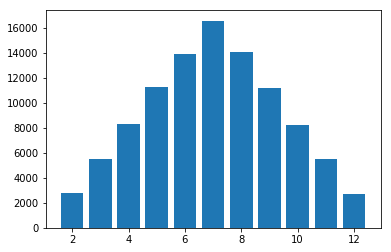

In [114]:
# Plot the outcome of simulating many dice rolling
labels, values = zip(*rolls_counts.items()) # Unpack dict
plt.bar(x=labels, 
        height=values);

Summary
------

- We now can:
    - Define outcomes
    - Run simulations many times
    - Organized the results


- We have most the common tools of Data Science:
    - Probability
    - Counting
    - Sorting
    - Visualization


References
----

- [Python's Standard Library Examples for random module](https://docs.python.org/3/library/random.html#examples-and-recipes)
- Raymond Hettinger's _Modern Python: Big Ideas and Little Code in Python_
    - [video](https://www.amazon.com/Lesson-Implementing-k-means-Unsupervised-Learning/dp/B0782H9R1B)
    - [code](https://github.com/rhettinger/modernpython)

